In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [54]:
df = pd.read_csv('C:/Users/Muzam/OneDrive/Desktop/MLProject/heart_disease.csv')

In [55]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,45.0,F,ASY,120.0,263.0,0.0,Normal,159.0,N,0.0,Up,0
1,58.0,M,ASY,116.0,239.0,0.0,LVH,154.0,Y,1.0,Flat,1
2,61.0,F,ATA,130.0,192.0,0.0,Normal,133.0,N,1.0,Flat,0
3,64.0,M,ASY,167.0,209.0,1.0,Normal,108.0,Y,3.0,Down,1
4,50.0,M,ASY,141.0,0.0,1.0,ST,157.0,N,0.0,Flat,1
5,56.0,M,ATA,116.0,263.0,0.0,Normal,138.0,N,0.0,Up,1
6,64.0,M,ASY,111.0,0.0,0.0,Normal,89.0,Y,0.0,Flat,1
7,57.0,M,NAP,163.0,0.0,0.0,Normal,76.0,Y,0.0,Flat,1
8,56.0,M,ASY,150.0,171.0,0.0,LVH,112.0,Y,3.0,Down,1
9,56.0,M,ASY,171.0,266.0,0.0,Normal,79.0,N,2.0,Flat,1


In [56]:
num_instances = len(df)
print(f"Number of instances in the DataFrame: {num_instances}")

Number of instances in the DataFrame: 15000


In [57]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,54.30920,133.075467,191.091867,0.271933,133.880133,1.030467,0.700000
std,9.63541,19.852551,117.057733,0.444971,25.911356,1.113802,0.458273
min,25.00000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000
25%,48.00000,120.000000,152.000000,0.000000,116.000000,0.000000,0.000000
50%,55.00000,131.000000,220.000000,0.000000,132.000000,1.000000,1.000000
75%,61.00000,144.000000,267.000000,1.000000,152.000000,2.000000,1.000000
max,83.00000,225.000000,653.000000,1.000000,221.000000,7.000000,1.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             15000 non-null  float64
 1   Sex             15000 non-null  object 
 2   ChestPainType   15000 non-null  object 
 3   RestingBP       15000 non-null  float64
 4   Cholesterol     15000 non-null  float64
 5   FastingBS       15000 non-null  float64
 6   RestingECG      15000 non-null  object 
 7   MaxHR           15000 non-null  float64
 8   ExerciseAngina  15000 non-null  object 
 9   Oldpeak         15000 non-null  float64
 10  ST_Slope        15000 non-null  object 
 11  HeartDisease    15000 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 1.4+ MB


In [59]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [60]:
df.dropna(inplace=True)

In [61]:
df.duplicated().sum()

9

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [64]:
df.duplicated().sum()

0

In [65]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_col = 'HeartDisease'
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

Age outliers: 39
RestingBP outliers: 311
Cholesterol outliers: 138
FastingBS outliers: 0
MaxHR outliers: 32
Oldpeak outliers: 40


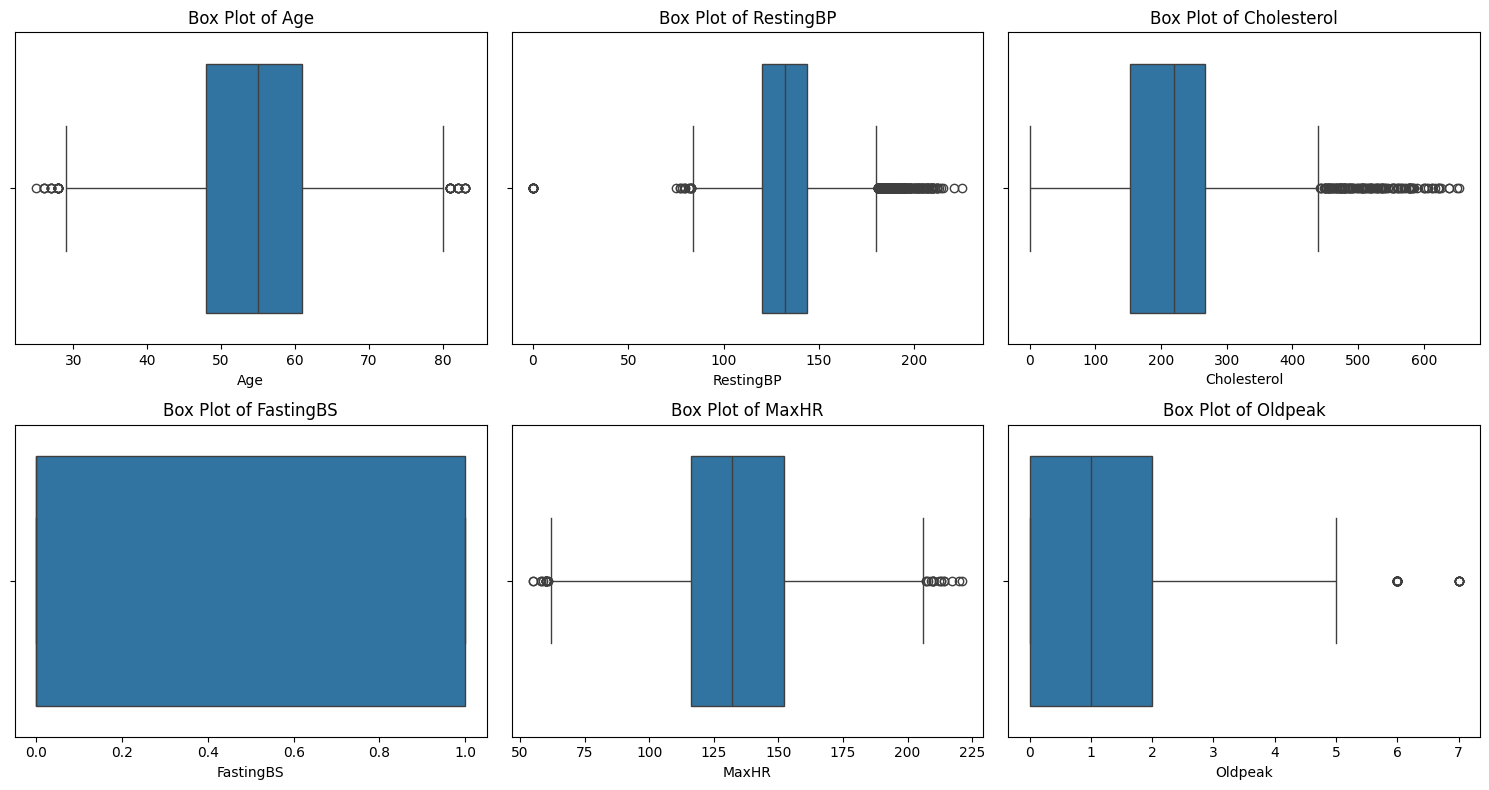

In [66]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

# Print outlier counts per numerical column
for col in numerical_cols:
    count = detect_outliers_iqr(df, col).shape[0]
    print(f"{col} outliers: {count}")

# Display box plots for numerical columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols)+1)//2, i)  # Arrange plots in 2 rows
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()



Shape of DataFrame after outlier removal: (14426, 12)

Outliers count after removal:
Age outliers: 0
RestingBP outliers: 0
Cholesterol outliers: 0
FastingBS outliers: 0
MaxHR outliers: 0
Oldpeak outliers: 0


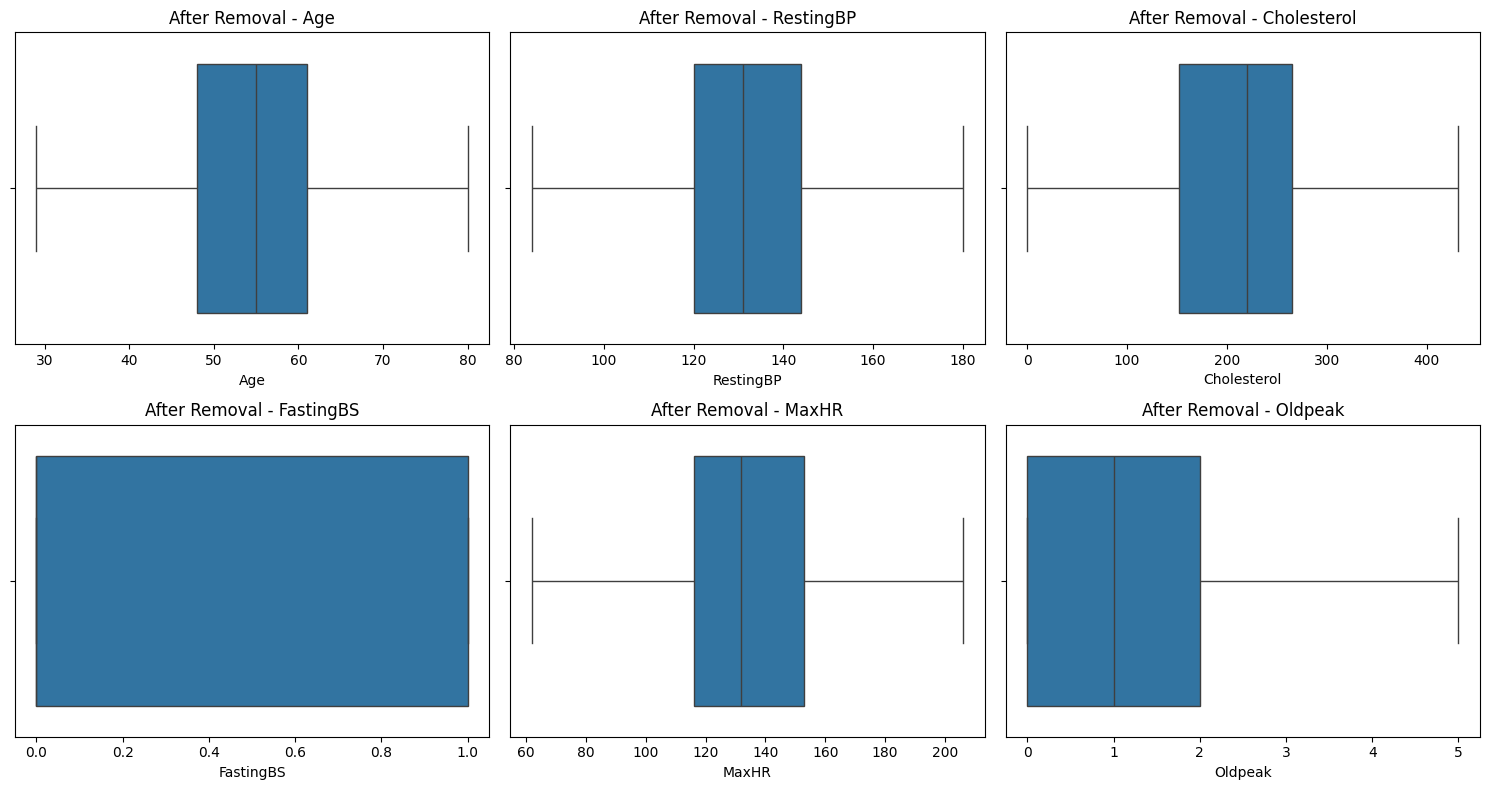

In [67]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"\nShape of DataFrame after outlier removal: {df.shape}")

# Print outlier counts after removal (should be zero or near zero)
print("\nOutliers count after removal:")
for col in numerical_cols:
    count = detect_outliers_iqr(df, col).shape[0]
    print(f"{col} outliers: {count}")

# Show box plots after removal
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols)+1)//2, i)
    sns.boxplot(x=df[col])
    plt.title(f'After Removal - {col}')
plt.tight_layout()
plt.show()

In [68]:
ordinal_mappings = { 'ST_Slope': ['Up', 'Flat', 'Down'] }
label_encoders = {}

for col in categorical_cols:
    if col in ordinal_mappings:
        df[[col]] = OrdinalEncoder(categories=[ordinal_mappings[col]]).fit_transform(df[[col]])
    else:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [69]:
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

X_train_processed = pd.concat([X_train_scaled_df, X_train[categorical_cols]], axis=1)
X_test_processed = pd.concat([X_test_scaled_df, X_test[categorical_cols]], axis=1)

Class distribution before SMOTE:
HeartDisease
1    7036
0    3062
Name: count, dtype: int64


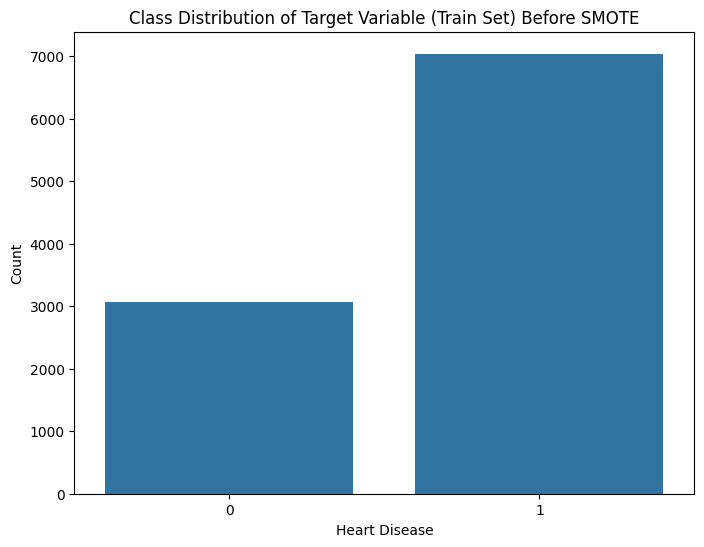

In [71]:
# Check class balance of the target variable
print("Class distribution before SMOTE:")
print(y_train.value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution of Target Variable (Train Set) Before SMOTE')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

Before SMOTE: HeartDisease
1    7036
0    3062
Name: count, dtype: int64
After SMOTE: HeartDisease
1    7036
0    7036
Name: count, dtype: int64


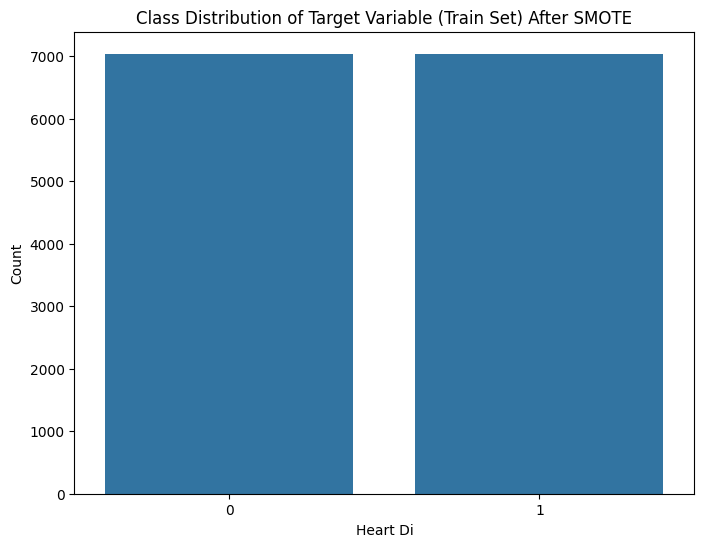

In [72]:
print("Before SMOTE:", y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("After SMOTE:", y_train_resampled.value_counts())

# Plot the class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution of Target Variable (Train Set) After SMOTE')
plt.xlabel('Heart Di')
plt.ylabel('Count')
plt.show()

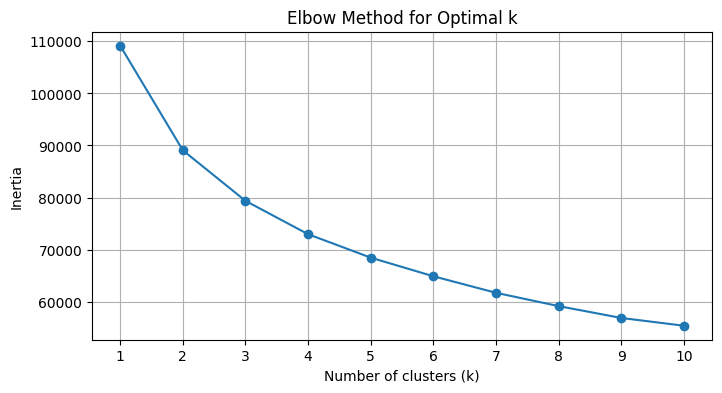

KMeans Silhouette Score: 0.1791312070091969
Agglomerative Clustering Silhouette Score: 0.13266181911063318
KMeans Davies-Bouldin Index: 1.9992822081287194
Agglomerative Clustering Davies-Bouldin Index: 2.255564630616027


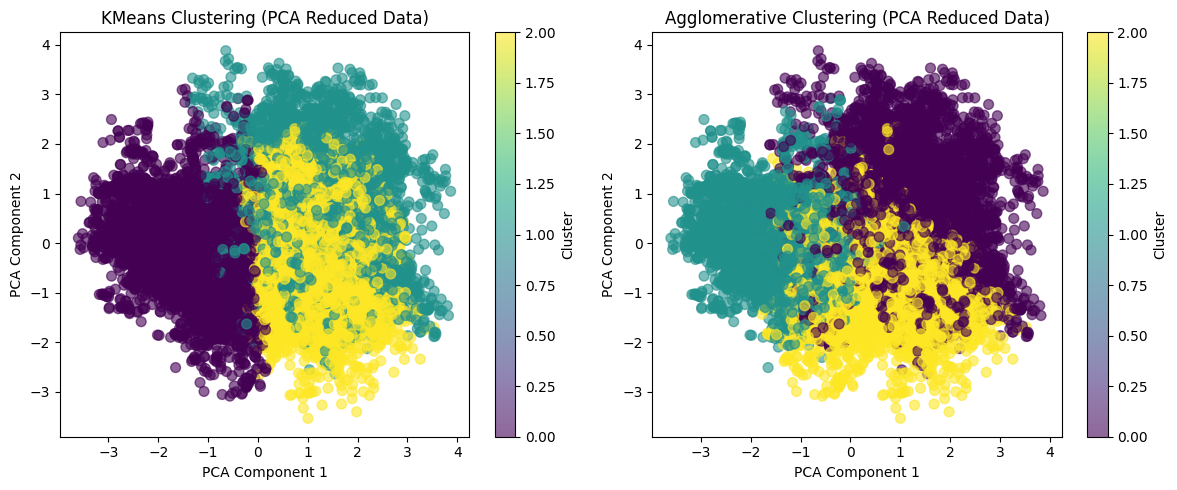

In [77]:
# Using all features in the processed training data for clustering
X_train_cluster = X_train_resampled.copy()

# Determine optimal number of clusters (e.g., using Elbow Method or Silhouette Score)
# Since this is unsupervised, we don't use y_train_resampled for fitting,
# but we can use it to evaluate the clustering performance against the known classes later (though not strictly part of unsupervised validation)

# Using Elbow Method to find optimal k for KMeans
inertia = []
max_k = 10 # Choose a reasonable maximum number of clusters to test
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init
    kmeans.fit(X_train_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_k + 1), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

# Based on the Elbow method plot, choose a suitable k.
# For demonstration, let's assume k=2 or k=3 seems reasonable based on the plot inflection point.
# Let's try k=2 as it aligns with the original target variable classes.

k_optimal = 3

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10) # Added n_init
kmeans_clusters = kmeans.fit_predict(X_train_cluster)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=k_optimal)
agg_clusters = agg_clustering.fit_predict(X_train_cluster)

# --- Clustering Validation Techniques ---

# 1. Silhouette Score
# Measures how similar an object is to its own cluster compared to other clusters.
# Higher values indicate better-defined clusters.
silhouette_avg_kmeans = silhouette_score(X_train_cluster, kmeans_clusters)
silhouette_avg_agg = silhouette_score(X_train_cluster, agg_clusters)

print(f"KMeans Silhouette Score: {silhouette_avg_kmeans}")
print(f"Agglomerative Clustering Silhouette Score: {silhouette_avg_agg}")

# 2. Davies-Bouldin Index
# Measures the average similarity ratio of each cluster with its most similar cluster.
# Lower values indicate better partitioning.
davies_bouldin_kmeans = davies_bouldin_score(X_train_cluster, kmeans_clusters)
davies_bouldin_agg = davies_bouldin_score(X_train_cluster, agg_clusters)

print(f"KMeans Davies-Bouldin Index: {davies_bouldin_kmeans}")
print(f"Agglomerative Clustering Davies-Bouldin Index: {davies_bouldin_agg}")

#visualize the clusters using elbow method
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_cluster)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_clusters, cmap='viridis', s=50, alpha=0.6)
plt.title('KMeans Clustering (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=agg_clusters, cmap='viridis', s=50, alpha=0.6)
plt.title('Agglomerative Clustering (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

In [74]:
from sklearn.metrics import adjusted_rand_score

print("\n--- External Clustering Validation (using Adjusted Rand Index) ---")

# Calculate ARI between KMeans clusters and the true labels
ari_kmeans = adjusted_rand_score(y_train_resampled, kmeans_clusters)
print(f"Adjusted Rand Index (ARI) - KMeans vs True Labels: {ari_kmeans}")

# Calculate ARI between Agglomerative clusters and the true labels
ari_agg = adjusted_rand_score(y_train_resampled, agg_clusters)

print(f"Adjusted Rand Index (ARI) - Agglomerative Clustering vs True Labels: {ari_agg}")



--- External Clustering Validation (using Adjusted Rand Index) ---
Adjusted Rand Index (ARI) - KMeans vs True Labels: 0.3953041609080018
Adjusted Rand Index (ARI) - Agglomerative Clustering vs True Labels: 0.2546646434282108



--- Univariate Feature Selection (SelectKBest) ---
Top 8 features selected by SelectKBest (f_classif):
['Age', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']

Feature Scores (SelectKBest - f_classif):
ST_Slope          6594.112062
ExerciseAngina    4871.505627
Oldpeak           3041.661677
MaxHR             2995.871153
ChestPainType     2502.752217
Sex               1549.558031
FastingBS         1156.972016
Age               1005.877242
Cholesterol        999.830284
RestingBP           94.917769
RestingECG          39.304820
dtype: float64


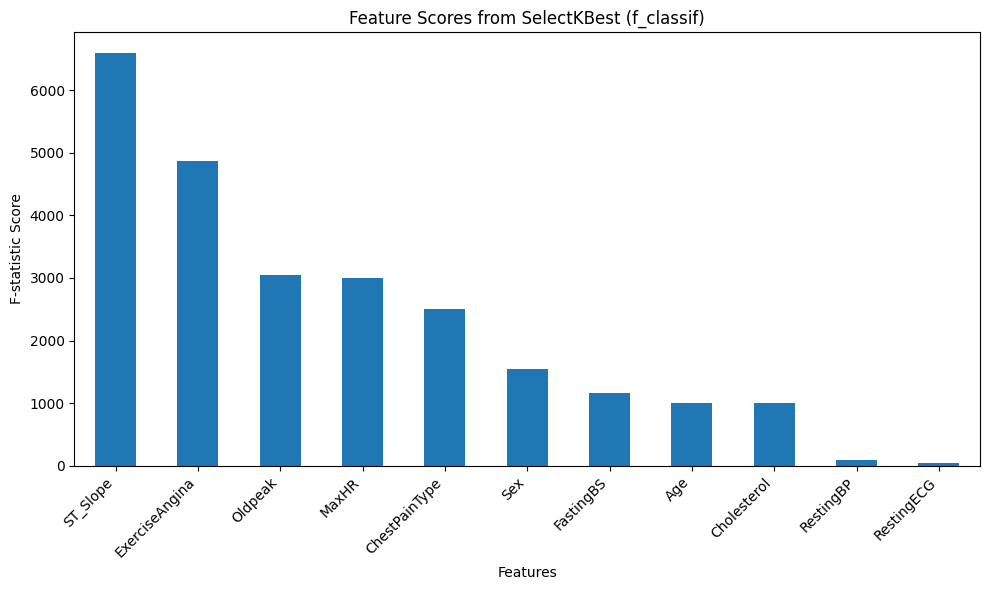

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
print("\n--- Univariate Feature Selection (SelectKBest) ---")

# Select top k features (e.g., k=5)
k_features = 8
selector_kbest = SelectKBest(score_func=f_classif, k=k_features) # Using f_classif

# Fit on the processed training data
selector_kbest.fit(X_train_resampled, y_train_resampled)

# Get the indices of the selected features
selected_features_kbest_indices = selector_kbest.get_support(indices=True)

# Get the names of the selected features
selected_features_kbest_names = X_train_resampled.columns[selected_features_kbest_indices]

print(f"Top {k_features} features selected by SelectKBest (f_classif):")
print(selected_features_kbest_names.tolist())

# Get the scores of the features
feature_scores_kbest = pd.Series(selector_kbest.scores_, index=X_train_resampled.columns)
feature_scores_kbest_sorted = feature_scores_kbest.sort_values(ascending=False)

print("\nFeature Scores (SelectKBest - f_classif):")
print(feature_scores_kbest_sorted)

# Visualize feature scores
plt.figure(figsize=(10, 6))
feature_scores_kbest_sorted.plot(kind='bar')
plt.title('Feature Scores from SelectKBest (f_classif)')
plt.ylabel('F-statistic Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



--- Model-based Feature Selection (RandomForestClassifier) ---

Feature Importances (RandomForestClassifier):
ST_Slope          0.251066
ChestPainType     0.152619
Cholesterol       0.113300
MaxHR             0.089269
ExerciseAngina    0.080707
Oldpeak           0.077142
RestingBP         0.064618
Age               0.062633
Sex               0.039763
RestingECG        0.035313
FastingBS         0.033571
dtype: float64

Top 8 features selected by RandomForestClassifier:
['ST_Slope', 'ChestPainType', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'RestingBP', 'Age']


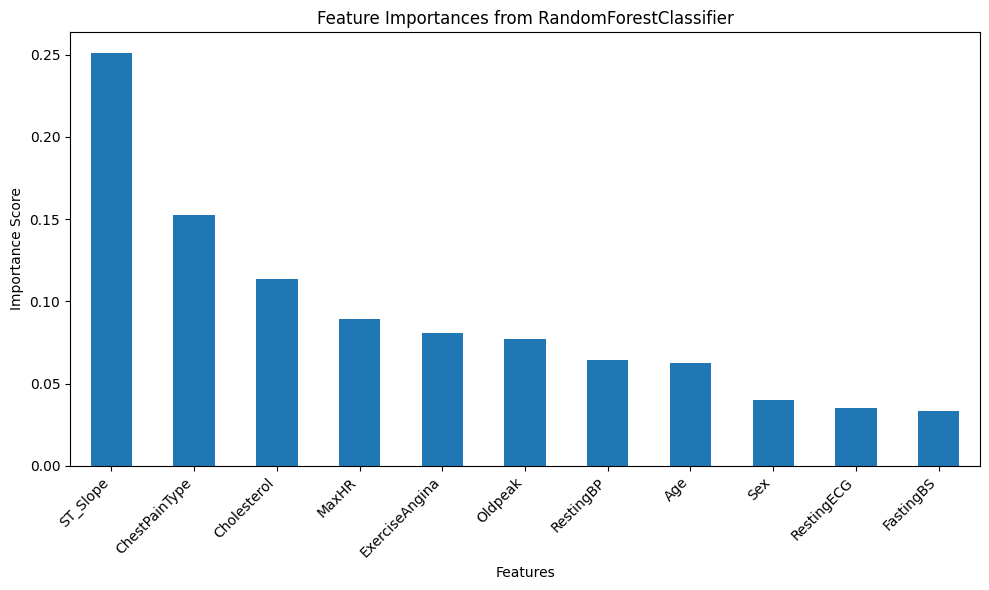

In [43]:
# 2. Model-based Feature Selection (e.g., using RandomForestClassifier)
# Using feature_importances_ attribute

print("\n--- Model-based Feature Selection (RandomForestClassifier) ---")

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train_resampled.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

print("\nFeature Importances (RandomForestClassifier):")
print(feature_importances_sorted)

# Select features based on importance (e.g., top k or features with importance > threshold)
# Let's select the same number of features as SelectKBest for comparison
selected_features_rf_names = feature_importances_sorted.head(k_features).index.tolist()

print(f"\nTop {k_features} features selected by RandomForestClassifier:")
print(selected_features_rf_names)

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances_sorted.plot(kind='bar')
plt.title('Feature Importances from RandomForestClassifier')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
chosen_features = selected_features_rf_names
print(f"\nChosen feature set for further experiments: {chosen_features}")

# Create new dataframes with only the chosen features
X_train_selected = X_train_resampled[chosen_features]
X_test_selected = X_test_processed[chosen_features] # Apply to the original test set (processed)

print("\nShape of training data with selected features:", X_train_selected.shape)
print("Shape of test data with selected features:", X_test_selected.shape)


Chosen feature set for further experiments: ['ST_Slope', 'ChestPainType', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'RestingBP', 'Age']

Shape of training data with selected features: (14072, 8)
Shape of test data with selected features: (4328, 8)


Class distribution before applying other imbalance techniques:
HeartDisease
1    7036
0    3062
Name: count, dtype: int64


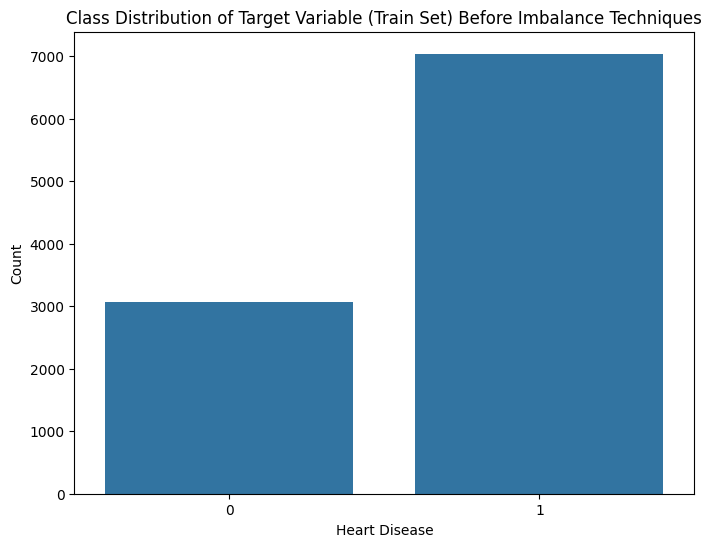

In [45]:
from imblearn.over_sampling import ADASYN

# Check class balance again before applying new techniques
print("Class distribution before applying other imbalance techniques:")
print(y_train.value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution of Target Variable (Train Set) Before Imbalance Techniques')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


--- Applying ADASYN ---
After ADASYN: HeartDisease
1    7036
0    6952
Name: count, dtype: int64


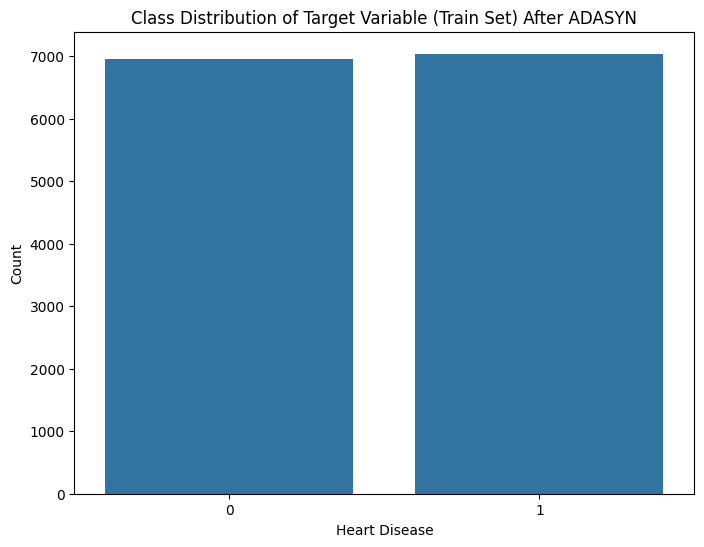

In [46]:
print("\n--- Applying ADASYN ---")
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_processed, y_train)

print("After ADASYN:", y_train_adasyn.value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_adasyn)
plt.title('Class Distribution of Target Variable (Train Set) After ADASYN')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
# We will use the ADASYN resampled data for training as an example
X_train_final = X_train_adasyn
y_train_final = y_train_adasyn

# And the original processed test data for evaluation
X_test_final = X_test_processed
y_test_final = y_test

# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Support Vector Machine (SVC)": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42), # Boosting Algorithm
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42), # Boosting Algorithm
}

results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n--- Training and evaluating {name} ---")
    clf.fit(X_train_final, y_train_final)
    y_pred = clf.predict(X_test_final)

    accuracy = accuracy_score(y_test_final, y_pred)
    precision = precision_score(y_test_final, y_pred)
    recall = recall_score(y_test_final, y_pred)
    f1 = f1_score(y_test_final, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Summarize results
print("\n--- Classification Results Summary ---")
results_df = pd.DataFrame(results).T
results_df


--- Training and evaluating Logistic Regression ---

--- Training and evaluating Support Vector Machine (SVC) ---

--- Training and evaluating Decision Tree ---

--- Training and evaluating Gradient Boosting Classifier ---

--- Training and evaluating AdaBoost Classifier ---

--- Classification Results Summary ---


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.819316,0.950383,0.781426,0.857663
Support Vector Machine (SVC),0.917976,0.984341,0.896517,0.938379
Decision Tree,0.948706,0.962877,0.963516,0.963196
Gradient Boosting Classifier,0.904344,0.960354,0.899834,0.929110
AdaBoost Classifier,0.841728,0.941958,0.823549,0.878783



--- Performance Measures for Logistic Regression ---
Accuracy: 0.8547
Precision: 0.9409
Recall: 0.8444
F1-Score: 0.8901

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79      1313
           1       0.94      0.84      0.89      3015

    accuracy                           0.85      4328
   macro avg       0.83      0.86      0.84      4328
weighted avg       0.87      0.85      0.86      4328


Confusion Matrix:
[[1153  160]
 [ 469 2546]]


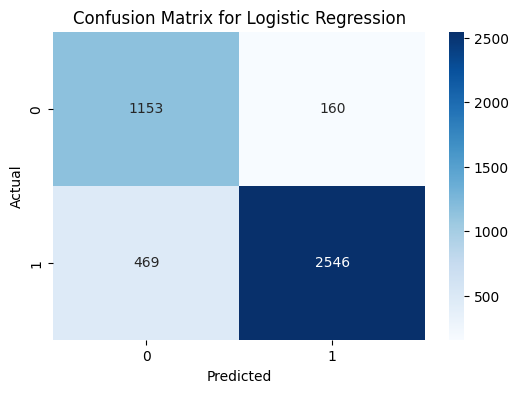


--- Performance Measures for Support Vector Machine (SVC) ---
Accuracy: 0.9439
Precision: 0.9756
Recall: 0.9430
F1-Score: 0.9590

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1313
           1       0.98      0.94      0.96      3015

    accuracy                           0.94      4328
   macro avg       0.93      0.94      0.93      4328
weighted avg       0.95      0.94      0.94      4328


Confusion Matrix:
[[1242   71]
 [ 172 2843]]


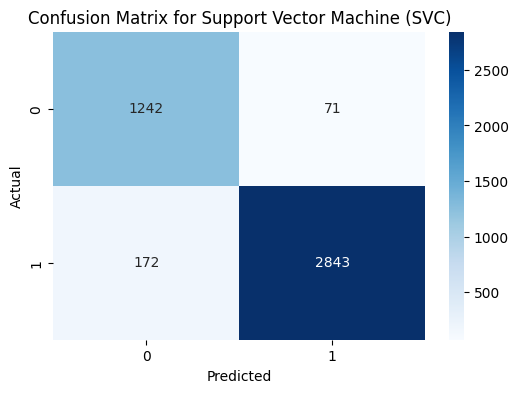


--- Performance Measures for Decision Tree ---
Accuracy: 0.9593
Precision: 0.9752
Recall: 0.9662
F1-Score: 0.9707

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1313
           1       0.98      0.97      0.97      3015

    accuracy                           0.96      4328
   macro avg       0.95      0.95      0.95      4328
weighted avg       0.96      0.96      0.96      4328


Confusion Matrix:
[[1239   74]
 [ 102 2913]]


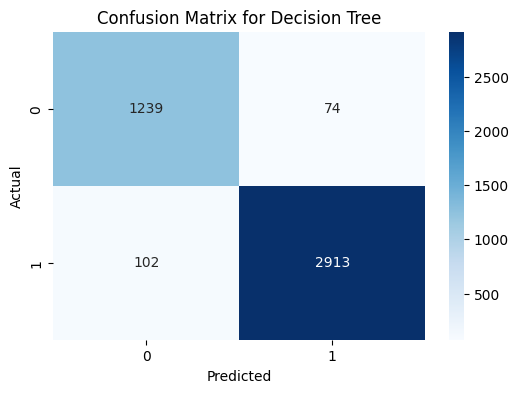


--- Performance Measures for Gradient Boosting Classifier ---
Accuracy: 0.9219
Precision: 0.9640
Recall: 0.9224
F1-Score: 0.9427

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1313
           1       0.96      0.92      0.94      3015

    accuracy                           0.92      4328
   macro avg       0.90      0.92      0.91      4328
weighted avg       0.93      0.92      0.92      4328


Confusion Matrix:
[[1209  104]
 [ 234 2781]]


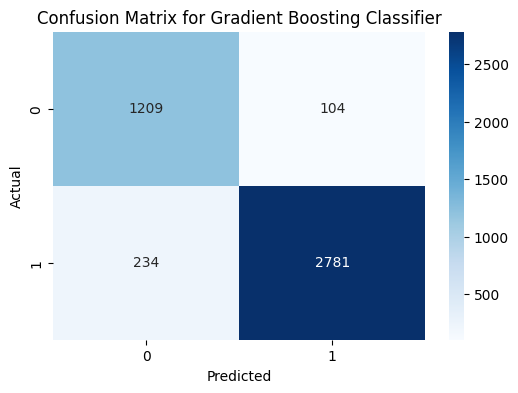


--- Performance Measures for AdaBoost Classifier ---
Accuracy: 0.8785
Precision: 0.9443
Recall: 0.8773
F1-Score: 0.9096

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1313
           1       0.94      0.88      0.91      3015

    accuracy                           0.88      4328
   macro avg       0.85      0.88      0.86      4328
weighted avg       0.89      0.88      0.88      4328


Confusion Matrix:
[[1157  156]
 [ 370 2645]]


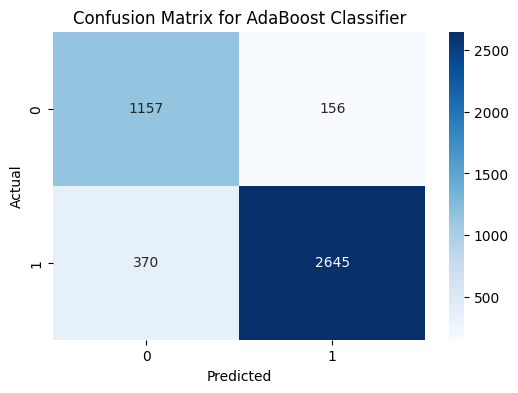


--- Classification Results Summary ---


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.854667,0.940872,0.844444,0.890054
Support Vector Machine (SVC),0.943854,0.975635,0.942952,0.959015
Decision Tree,0.959335,0.975226,0.966169,0.970676
Gradient Boosting Classifier,0.921904,0.963951,0.922388,0.942712
AdaBoost Classifier,0.878466,0.944306,0.877280,0.909560


In [49]:
# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n--- Performance Measures for {name} ---")
    clf.fit(X_train_final, y_train_final)
    y_pred = clf.predict(X_test_final)

    # Accuracy
    accuracy = accuracy_score(y_test_final, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision
    precision = precision_score(y_test_final, y_pred)
    print(f"Precision: {precision:.4f}")

    # Recall
    recall = recall_score(y_test_final, y_pred)
    print(f"Recall: {recall:.4f}")

    # F1-Score
    f1 = f1_score(y_test_final, y_pred)
    print(f"F1-Score: {f1:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test_final, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test_final, y_pred)
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Summarize results (already done in the previous chunk, but repeating for completeness)
print("\n--- Classification Results Summary ---")
results_df = pd.DataFrame(results).T
results_df